In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [145]:
train.shape


(891, 12)

In [146]:
test.shape

(418, 11)

In [147]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [150]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [151]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [152]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [153]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [155]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [156]:
test['Fare'].fillna(train['Fare'].mean(),inplace=True)

In [157]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

C:\Users\deepak.thakur\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

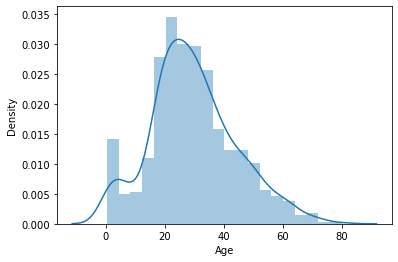

In [158]:
sns.distplot(train['Age'])

In [159]:
train_age = np.random.randint(train['Age'].mean() - train['Age'].std(), train['Age'].mean() + train['Age'].std(),177)

In [160]:
test_age = np.random.randint(test['Age'].mean() - test['Age'].std(), test['Age'].mean() + test['Age'].std(),86)

In [161]:
train['Age'][train['Age'].isnull()]=train_age

<ipython-input-161-603ae26aeeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [162]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [163]:
test['Age'][test['Age'].isnull()]=test_age

<ipython-input-163-abf9310a3d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [164]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [165]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [166]:
#train[train['Pclass']==1]['Survived'].value_counts()
train[train['Pclass']==2]['Survived'].value_counts()
#train[train['Pclass']==3]['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [167]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [168]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [169]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\deepak.thakur\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

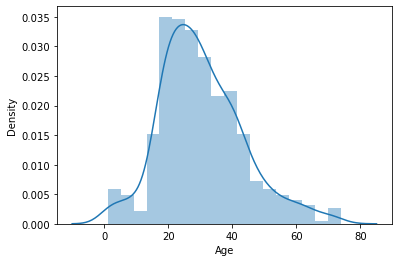

In [170]:
sns.distplot(train['Age'][train['Survived']==0])

C:\Users\deepak.thakur\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

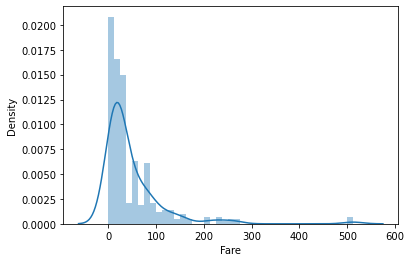

In [171]:
sns.distplot(train['Fare'][train['Survived']==1])

In [172]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [173]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

In [174]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [175]:
train[['SibSp','Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [176]:
train['family'] = train['SibSp'] + train['Parch'] + 1


In [177]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [178]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [179]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [180]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [181]:
train['family_size'] = train['family'].apply(cal)

In [182]:
test['family_size'] = test['family'].apply(cal)

In [183]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,42.0,1,2,23.4500,S,4,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,Alone


In [184]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,17.0,0,0,8.0500,S,1,Alone
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,Alone
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1,Alone
416,1308,3,"Ware, Mr. Frederick",male,39.0,0,0,8.0500,S,1,Alone


In [185]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [186]:
test.shape

(418, 8)

In [187]:
train.shape

(891, 9)

In [188]:
passenger_Id = test['PassengerId'].values

In [189]:
train.drop(columns=['Name','PassengerId','Fare'],inplace=True)
test.drop(columns=['Name','PassengerId','Fare'],inplace=True)

In [190]:
train

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone
...,...,...,...,...,...,...
886,0,2,male,27.0,S,Alone
887,1,1,female,19.0,S,Alone
888,0,3,female,42.0,S,Medium
889,1,1,male,26.0,C,Alone


In [191]:
test

,Pclass,Sex,Age,Embarked,family_size
0,3,male,34.5,Q,Alone
1,3,female,47.0,S,Medium
2,2,male,62.0,Q,Alone
3,3,male,27.0,S,Alone
4,3,female,22.0,S,Medium
...,...,...,...,...,...
413,3,male,17.0,S,Alone
414,1,female,39.0,C,Alone
415,3,male,38.5,S,Alone
416,3,male,39.0,S,Alone


In [192]:
train = pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [193]:
train

,Survived,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,0,22.0,0,1,1,0,1,0,1
1,1,38.0,0,0,0,0,0,0,1
2,1,26.0,0,1,0,0,1,0,0
3,1,35.0,0,0,0,0,1,0,1
4,0,35.0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,27.0,1,0,1,0,1,0,0
887,1,19.0,0,0,0,0,1,0,0
888,0,42.0,0,1,0,0,1,0,1
889,1,26.0,0,0,1,0,0,0,0


In [194]:
test = pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [195]:
test

,Age,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_Medium
0,34.5,0,1,1,1,0,0,0
1,47.0,0,1,0,0,1,0,1
2,62.0,1,0,1,1,0,0,0
3,27.0,0,1,1,0,1,0,0
4,22.0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
413,17.0,0,1,1,0,1,0,0
414,39.0,0,0,0,0,0,0,0
415,38.5,0,1,1,0,1,0,0
416,39.0,0,1,1,0,1,0,0


In [196]:
X = train.iloc[:,1:].values
y=train.iloc[:,0].values

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [199]:
classifier = DecisionTreeClassifier()

In [200]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [201]:
y_pred = classifier.predict(X_test)

In [202]:
accuracy_score(y_pred, y_test)

0.770949720670391

In [203]:
# Now performing on test data

Xf = test.iloc[:,:].values

In [204]:
y_final = classifier.predict(Xf)

In [205]:
final = pd.DataFrame()

In [206]:
final['passengerId'] = passenger_Id
final['survived'] = y_final

In [207]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [209]:
final.to_csv('submission2.csv',index=False)